Backtesting and Report for Moving Average Crossover

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=== Moving Average Crossover Strategy ===
Total Return: 43.42%
Number of Trades: 9


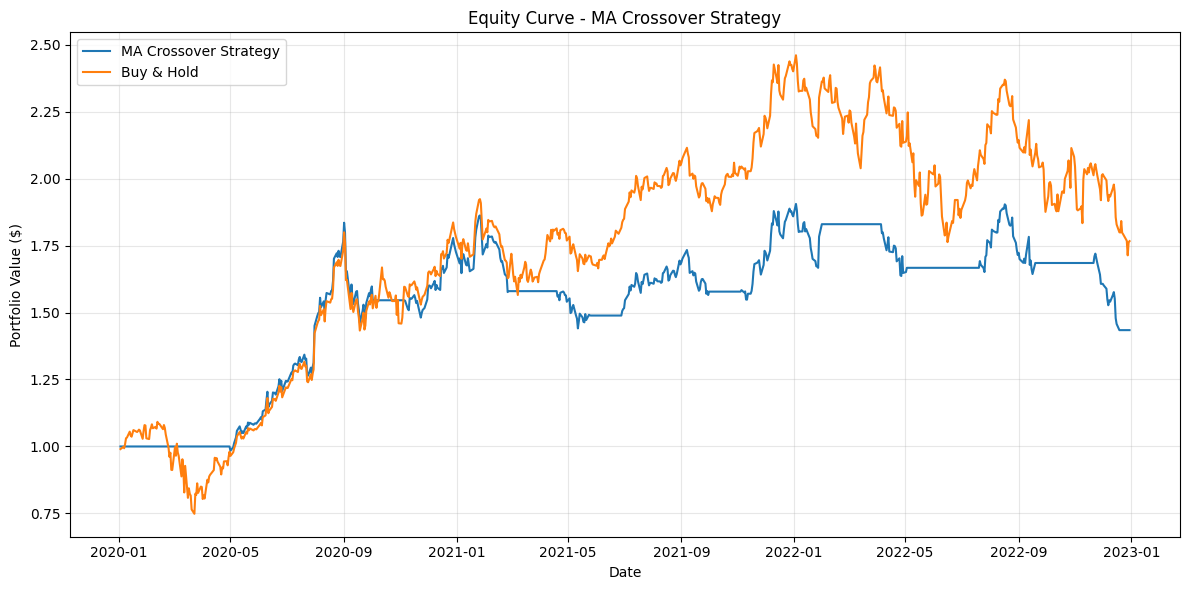

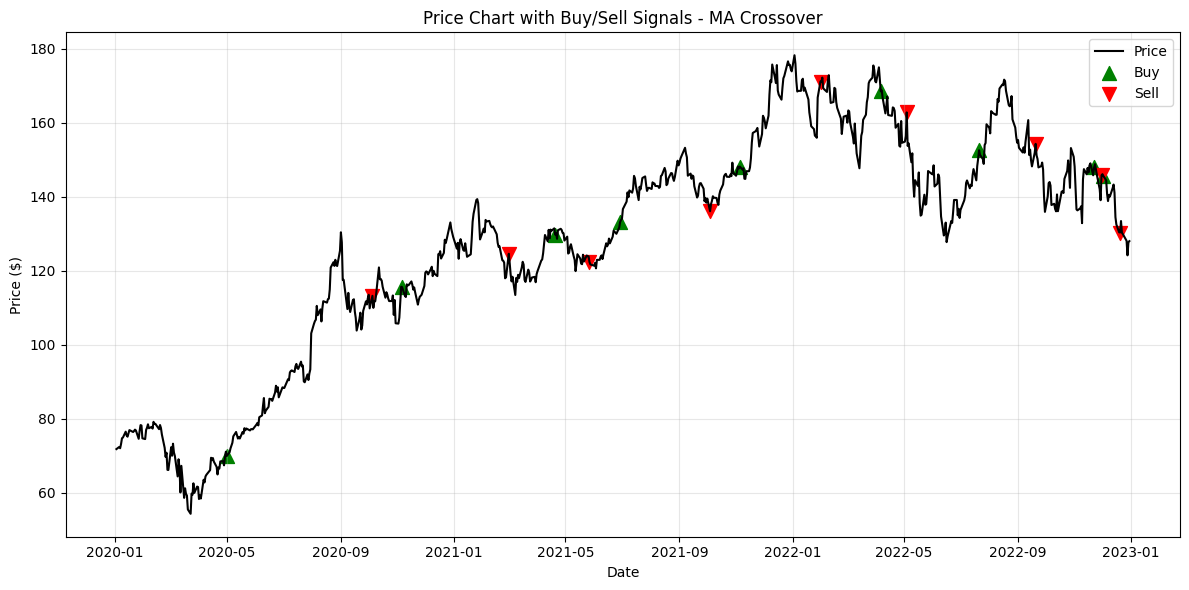

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Run the backtest and report the results
QUIET = True
%run loading-price-data.ipynb
%run backtesting-framework.ipynb
%run moving-average-crossover.ipynb

# Load MA Crossover strategy
signal_ma = ma_crossover_momentum_strategy(data, fast_n=20, slow_n=50)
results_ma = backtest_framework(data, signal_ma)
